# <center><font size ="9"> Lab 01 </font></center>
<center><font size ="6"> Data Visualization: Covid 19 Report - 21/4/2021</font></center></br>
<p style='text-align: right;'><font size ="3"> University of Science - VNUHCM</font></p>
</br>

## Request: 

- Focus on visualization
- Do not use color to describe information
- Do not use software like Tableau

## Yêu Cầu:
- Tập trung vào trực quan hóa
- Không sử dụng màu để hiểu dữ liệu
- Không dùng phần mềm như Tableau

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from  matplotlib.ticker import PercentFormatter
import seaborn as sns
from IPython.display import Image, display
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
#Set Option
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_theme()

## Open File

In [3]:
df = pd.read_csv('data/Worldometer_4_21.csv', index_col = 0)

In [4]:
df.head(3)

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
#,,,,,,,,,,,,,,,,,
1,China,90541,21.0,4636,NaN,85600,27.0,305,6.0,63.0,3.0,160000000.0,111163.0,1439323776,15897.0,310467.0,9.0
2,USA,32602051,65057.0,583330,876.0,25177434,73818.0,6841287,10009.0,98032.0,1754.0,433439646.0,1303328.0,332563810,10.0,570.0,1.0
3,India,15924806,315802.0,184672,2102.0,13449406,179543.0,2290728,8944.0,11449.0,133.0,271053392.0,194876.0,1390901395,87.0,7532.0,5.0


## Preprocessing

### Xóa 3 cột cuối cột 

In [5]:
df = df.drop(columns=['1 Caseevery X ppl','1 Deathevery X ppl','1 Testevery X ppl'])

### Xóa 2 quốc gia có dân số bị trống

In [6]:
df[df['Population'] == ' ']

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
#,,,,,,,,,,,,,,
195,Diamond Princess,712,NaN,13,NaN,699,NaN,0,NaN,NaN,NaN,NaN,NaN,
217,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,NaN,NaN,NaN,


### Thay các số ca tử vong bằng 0 

In [7]:
df[df['TotalDeaths'] == ' '] = df[df['TotalDeaths'] == ' '].replace(' ',0)

In [8]:
df = df[df['Population'] != ' ']

In [9]:
df[['TotalDeaths','Population']] = df[['TotalDeaths','Population']].astype('int')

In [10]:
df.dtypes

Country,Other        object
TotalCases            int64
NewCases            float64
TotalDeaths           int32
NewDeaths           float64
TotalRecovered        int64
NewRecovered        float64
ActiveCases           int64
Serious,Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
TotalTests          float64
Tests/1M pop        float64
Population            int32
dtype: object

In [11]:
df.fillna(0,inplace=True)
df.head(3)

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
#,,,,,,,,,,,,,,
1,China,90541,21.0,4636,0.0,85600,27.0,305,6.0,63.0,3.0,160000000.0,111163.0,1439323776
2,USA,32602051,65057.0,583330,876.0,25177434,73818.0,6841287,10009.0,98032.0,1754.0,433439646.0,1303328.0,332563810
3,India,15924806,315802.0,184672,2102.0,13449406,179543.0,2290728,8944.0,11449.0,133.0,271053392.0,194876.0,1390901395


### Chuẩn hóa và lưu vào X_std

In [12]:
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df.select_dtypes(exclude='object').values)

## Simple Exploring

In [13]:
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25)
def median(df):
    return df.quantile(0.5)
def upper_quartile(df):
    return df.quantile(0.75)

In [14]:
numeric_df = df.select_dtypes(exclude='object')
numeric_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max]).round(1)

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
min,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,8.030000e+02
lower_quartile,5030.0,4.0,75.0,0.0,3830.0,0.0,197.0,0.0,1766.0,23.0,94558.0,42496.0,6.452855e+05
median,41475.0,135.0,640.0,2.0,35065.0,68.0,3675.0,14.0,15365.0,162.0,698132.0,217570.0,6.610425e+06
upper_quartile,290731.0,1315.5,4916.0,21.0,248504.0,1080.5,25744.5,227.0,53417.5,786.5,4129933.5,655175.5,2.437719e+07
max,32602051.0,315802.0,583330.0,3157.0,25177434.0,179543.0,6841287.0,10009.0,166962.0,2791.0,433439646.0,6724757.0,1.439324e+09


## Visualize Data

### Tot Cases/1M pop vs Deaths/1M pop

In [15]:
tot_deaths_df = df[['Tot Cases/1M pop','Deaths/1M pop']]
tot_deaths_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max]).round(1)

,Tot Cases/1M pop,Deaths/1M pop
missing_ratio,0.0,0.0
min,8.0,0.0
lower_quartile,1766.0,23.0
median,15365.0,162.0
upper_quartile,53417.5,786.5
max,166962.0,2791.0


Có thể thấy dữ liệu của "Tot Cases/1M pop" và "Deaths/1M pop" cách nhau rất là lớn vì vậy việc trực quan hóa giá trị của từng trường và so sánh với nhau không mang đến ý nghĩa quá nhiều. Vì vậy ở đây đối với trực quan các trường dữ liệu "Tot Cases/1M pop" và "Deaths/1M pop" ta sử dụng biểu đồ histogram để xem xét sự phân phối của các trường sẽ mang lại cái nhìn tốt hơn

**Tot Cases/1M pop**

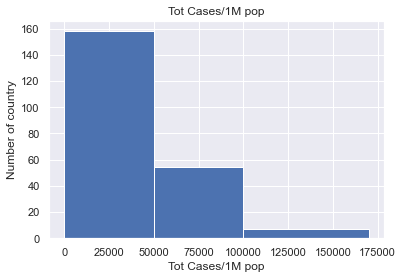

In [16]:
plt.hist(df['Tot Cases/1M pop'], bins = [0,50000,100000,170000])
plt.xlabel('Tot Cases/1M pop')
plt.ylabel('Number of country')
plt.title('Tot Cases/1M pop')
plt.show()

In [17]:
df[df['Tot Cases/1M pop'] > 100000]['Country,Other'].count()

7

Nhận xét về "Tot Cases/1M pop":
- Đa phần các quốc gia nằm trong khoảng từ 0 đến 50000 với con số khoảng 160 quốc gia
- Trên 50 quốc gia có chỉ số "Tot Cases/1M pop" từ 50000 - 100000
- Các quốc gia mang chỉ số "Tot Cases/1M pop" cao hơn 100000 rất là ít với con số là 7 quốc gia


In [18]:
totcases = (df['Tot Cases/1M pop'].max()/1000000)*100
df[df['Tot Cases/1M pop'] == df['Tot Cases/1M pop'].max()]['Country,Other'], totcases

(#
 139    Andorra
 Name: Country,Other, dtype: object,
 16.6962)

Đặc biệt đáng lưu ý một điều là "Tot Cases/1M pop" là chỉ số mang ý nghĩa chỉ phần trăm dân số đã bị lây nhiễm Covid. Tức có nghĩa là đã có 7 quốc gia đạt đến con số trên 10% dân số bị nhiễm COVID và dẫn đầu là "Andorra" với tỉ lệ phần trăm là 16.69%

**Deaths/1M pop**

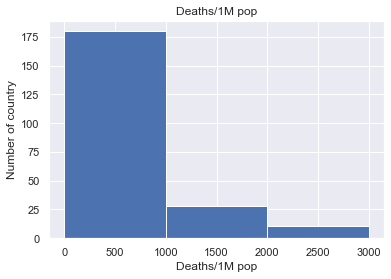

In [19]:
plt.hist(df['Deaths/1M pop'], bins = 3, range = [0,3000])
plt.xlabel('Deaths/1M pop')
plt.ylabel('Number of country')
plt.title('Deaths/1M pop')
plt.show()

In [20]:
df[df['Deaths/1M pop']>2000]['Country,Other'].count()

11

Nhận xét về "Deaths/1M pop":
- Đa phần các quốc gia đều có chỉ số "Deaths/1M pop" từ 0 - 1000 với có số trên 175 quốc gia
- Một số ít quốc gia có chỉ số "Deaths/1M pop" từ 1000 - 2000 với con số khoảng 25 quốc gia
- Và một số rất ít quốc gia khoảng 11 quốc gia có chỉ số "Deaths/1M pop" từ 2000 - 3000
- Đồng thời ta có thể thấy phân phối của "Deaths/1M pop" và "Tot Cases/1M pop" khá giống nhau khi đa phần các quốc gia đều mang giá trị thấp và một số quốc gia mang giá trị đặc biệt cao

In [21]:
deaths = (df['Deaths/1M pop'].max()/1000000)*100
df[df['Deaths/1M pop'] == df['Deaths/1M pop'].max()]['Country,Other'], deaths

(#
 168    Gibraltar
 Name: Country,Other, dtype: object,
 0.2791)

Mang ý nghĩa tương tự như "Tot Cases/1M pop" chỉ số "Deaths/1M pop" thể hiện tỉ lệ phần trăm dân số tử vong do Covid. Đồng thời có tới 11 quốc gia có tỉ lệ tử vong trên dân số cao lên tới trên 0.2% và "Gibraltar" là nơi có tỉ lệ tử vong trên dân số cao nhất là 0.27%

**Tot Cases/1M pop vs Deaths/1M pop**
Ở các biểu đồ trên ta có thể thẩy là dường như "Tot Cases/1M pop" và "Deaths/1M pop" có vẻ như có mối quan hệ gì đó với nhau khi mà phân phối của 2 chỉ số này khá giống nhau. Vì vậy ở đây ta sử dụng scatter chart để trực quan hóa dữ liệu của 2 trường này

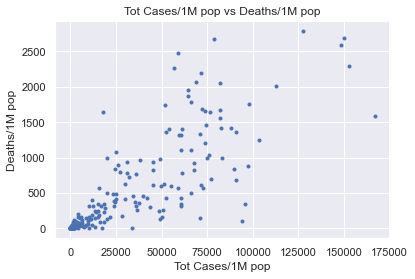

In [22]:
plt.scatter(df['Tot Cases/1M pop'], df['Deaths/1M pop'], marker= '.')
plt.xlabel('Tot Cases/1M pop')
plt.ylabel('Deaths/1M pop')
plt.title('Tot Cases/1M pop vs Deaths/1M pop')
plt.show()

Nhận xét "Tot Cases/1M pop" vs "Deaths/1M pop":
- Có thể thấy là hai trường có mối quan hệ tương quan với nhau
- Một số ít trường hợp có "Tot Cases/1M pop" thấp nhưng "Deaths/1M pop" cao và ngược lại, đây là các outlier của dữ liệu nhưng không ảnh hưởng quá nhiều trong việc thấy rõ sự tương quan của hai trường dữ liệu. Mặt khác việc này còn thể hiện trường "Deaths/1M pop" còn phụ thuộc vào các yếu tố khác chứ không chỉ phụ thuộc vào trường "Tot Cases/1M pop"
- Đồng thời có thể thầy tỉ lệ nhiễm bệnh của mỗi quốc gia càng cao thì tỉ lệ tử vong cũng tăng cao hơn nhiều so với các quốc gia có tỉ lệ nhiễm bệnh thấp
- Thật đáng mừng khi mà chỉ số "Deaths/1M pop" chỉ nằm ở một con số nhỏ hơn rất nhiều so với chỉ số "Tot Cases/1M pop" 

### "TotalCases" vs "TotalDeaths"

**TotalCases**

Sử dụng Pie chart để xem tỉ lệ phần trăm của top 3 quốc gia có tổng số ca mắc COVID cao nhất so với các quốc gia khác

In [23]:
top3 = df.nlargest(3, 'TotalCases')

label = top3['Country,Other']
s2 = pd.Series(['Other'])
label = label.append(s2)

value = top3['TotalCases']
s2 = pd.Series([df[df['TotalCases'] < top3['TotalCases'].min()].sum()[1]])
value = value.append(s2)

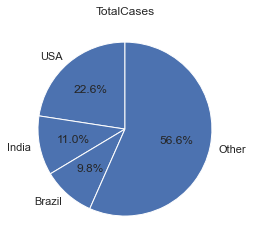

In [24]:
plt.pie(value, labels = label, colors = 'b', autopct='%1.1f%%', startangle=90)
plt.title('TotalCases')
plt.show()

Nhận xét về "TotalCases":
- Có thể thấy USA là quốc gia có tổng số ca mắc COVID cao nhất thế giới, đồng thời nó cũng chiếm tỉ lệ tới 22,6% trên tổng số ca nhiễm trên toàn thế giới gấp 2 lần quốc gia đứng thứ 2 là India với 11%
- Tổng số ca mắc COVID của 2 quốc gia India và Brazil chiếm tỉ trọng không quá nhiều

**TotalDeaths**

Dùng histogram để xem xét sự phân bố của tổng số người chết của các quốc gia

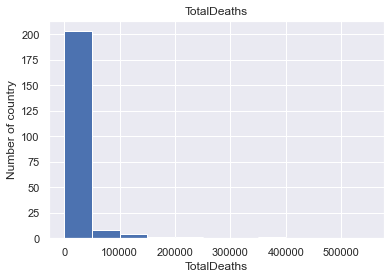

In [25]:
plt.hist(df['TotalDeaths'], bins = np.arange(0,600000,50000))
plt.xlabel('TotalDeaths')
plt.ylabel('Number of country')
plt.title('TotalDeaths')
plt.show()

Nhận xét "TotalDeaths":
- Có thể thầy hầu hết các quốc gia đều có tổng số người chết dưới 200000
- Một số ít quốc gia có tổng số người chết đặc biệt cao từ 200000 - 600000

**"TotalCases" vs "TotalDeaths"**
Dùng scatter chart để xem xét mối quan hệ giữa tổng số ca mắc bệnh và tổng số người chết

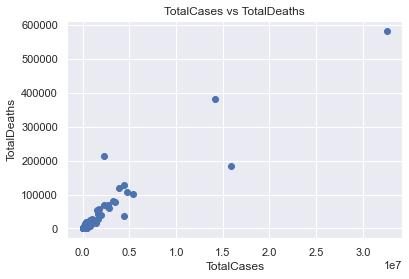

In [26]:
plt.scatter(df['TotalCases'], df['TotalDeaths'], marker= 'o')
plt.xlabel('TotalCases')
plt.ylabel('TotalDeaths')
plt.title(r'TotalCases vs TotalDeaths')
plt.show()

Nhận xét "TotalCases" vs "TotalDeaths":
- Hai chỉ só có mối quan hệ tương quan với nhau
- Hầu hết quốc gia đều đang ở tình trạng tổng số ca tử vong và ca mắc bệnh ở mức thấp
- Đặc biệt chỉ có một số rất ít quốc gia có tổng số ca tử vong và ca mắc bệnh có chỉ số cao ngất ngưỡng

## ActiveCases-NewCases and NewCases

Mối quan hệ giữa `ActiveCases` và `NewCases` là gì? Ta biết rằng người bệnh có thể lây nhiễm cho người khác, nhất là khi họ chưa được xác định là bị nhiễm. Vậy nên `ActiveCases` và `NewCases` có lẽ có mối quan hệ với nhau. Ở đây ta trừ `NewCases` ra khỏi `ActiveCases` vì `ActiveCases` chứa `NewCases`

In [27]:
df['Active - New'] = df['ActiveCases'] - df['NewCases']

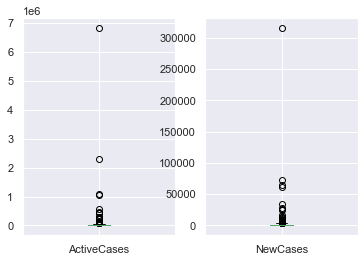

In [28]:
selected_cols = ['ActiveCases','NewCases']
df[selected_cols].plot(kind='box', layout = (1,2), subplots=True)
plt.show()

Note that both `ActiveCases` and `NewCases` are imbalanced

Lưu ý rằng cả hai `ActiveCases` và `NewCases` đều mất cân bằng

</br>

We use a scatter chart because both `ActiveCases` and `NewCases` are not continuous data

</br>

Ta sử dụng biểu đồ phân tán vì cả `ActiveCases` và `NewCases` đều không phải là dữ liệu liên tục

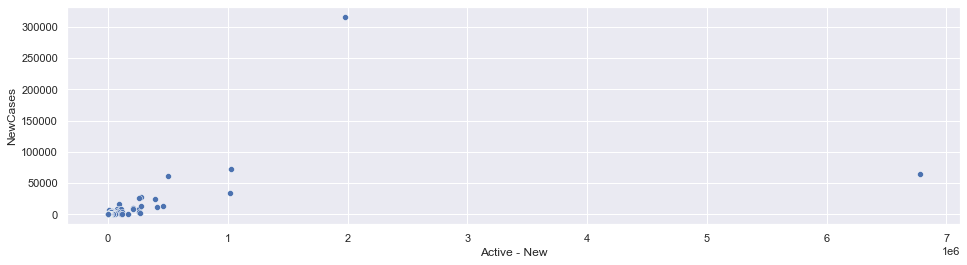

In [29]:
fig, axs = plt.subplots(nrows=1)
fig.set_size_inches(16, 4)
# plt.figure(figsize=(16,4))
# plt.axis([0, 1050000, 0, 100000])
sns.scatterplot(data = df, x = 'Active - New', y= 'NewCases', ax = axs);

Có hai điểm outlier đặc biệt:

</br>

Vô cùng cao ở `ActiveCases - NewCases` nhưng không quá cao ở `NewCases`:

In [30]:
df[df['Active - New'] == df['Active - New'].max()]

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Active - New
#,,,,,,,,,,,,,,,
2,USA,32602051,65057.0,583330,876.0,25177434,73818.0,6841287,10009.0,98032.0,1754.0,433439646.0,1303328.0,332563810,6776230.0


Nước Mĩ đã có một quãng thời gian khó khăn khi `Active Cases` rất cao, nhưng với số lượng ca nhiễm mới không quá cao, chứng tỏ họ đang dần vượt qua nó.

Vô cùng cao ở `NewCases`:

In [31]:
df[df['NewCases'] == df['NewCases'].max()]

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Active - New
#,,,,,,,,,,,,,,,
3,India,15924806,315802.0,184672,2102.0,13449406,179543.0,2290728,8944.0,11449.0,133.0,271053392.0,194876.0,1390901395,1974926.0


Ấn Độ hiện tại đang có xu hướng tăng mạnh các ca nhiễm

</br>


Kiểm tra mối quan hệ giữa hai trường:

In [32]:
res = stats.linregress(df['Active - New'],df['NewCases'])
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.238317


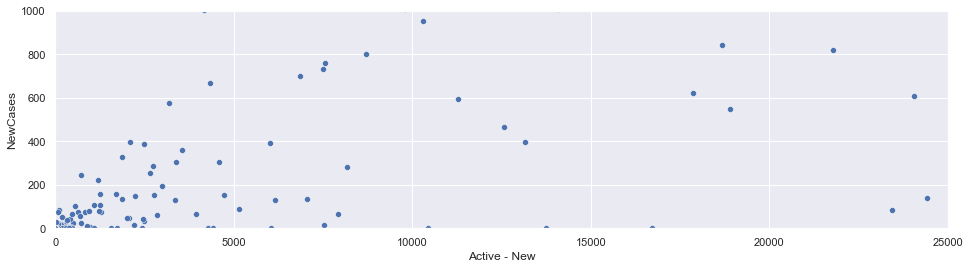

In [33]:
plt.figure(figsize=(16,4))
plt.axis([0, 25000, 0, 1000])
sns.scatterplot(data = df, x = 'Active - New', y= 'NewCases')
plt.plot(df['Active - New'], res.intercept + res.slope*df['Active - New']);

Ta có thể thấy rằng giữa `ActiveCases - NewCases` và `NewCases` không có mối quan hệ hồi quy vì R-square = 0.238317

Tuy nhiên, nhìn vào biểu đồ ta thấy khi `ActiveCases - NewCases` tăng, `NewCases` cũng tăng, và với suy luận ở đầu, ta có thể cho rằng chúng có mối quan hệ nhân quả với nhau.

</br>

## TotalTests, TotalDeaths, TotalRecovered

Chúng ta quan tâm đến 3 thuộc tính này, vì ta quan đến sự hồi phục, giảm thiểu ca tử vong, và ta có thể tác động đến số lượng xét nghiệm. Có thông tin gì ta có thể có được khi xem xét 3 thuộc tính này không?

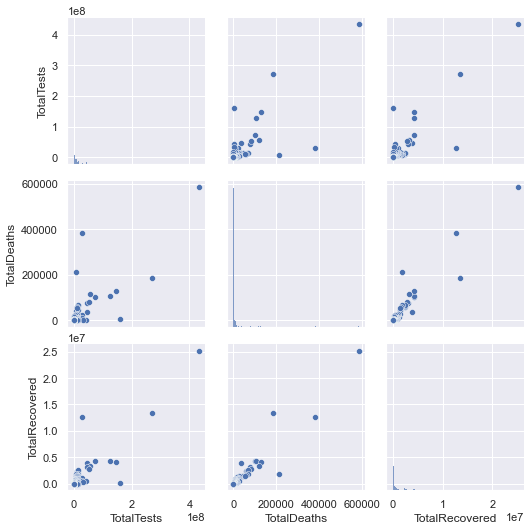

In [34]:
selected_cols = ['TotalTests','TotalDeaths','TotalRecovered']
sns.pairplot(df[selected_cols]);#, height=2.0)


Ta sử dụng biểu đồ phân tán vì cả `TotalDeaths` và `TotalRecovered` đều không phải là dữ liệu liên tục


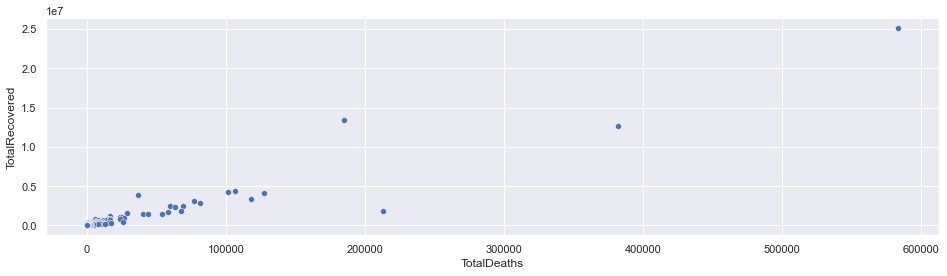

In [35]:
plt.figure(figsize=(16,4))
sns.scatterplot(data = df, x = 'TotalDeaths', y= 'TotalRecovered');#, style = 'TotalTests')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

</br>

Có vẻ rằng `TotalRecovered`có mối quan hệ hồi quy với `TotalDeaths`

Ta dùng framework scipy để tính toán mô hình hồi quy:

In [36]:
res = stats.linregress(df['TotalDeaths'],df['TotalRecovered'])
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.900844


In [37]:
print('w0 = ', res.intercept, '\nw1 = ', res.slope)

w0 =  13813.767173921107 
w1 =  39.03119490579897


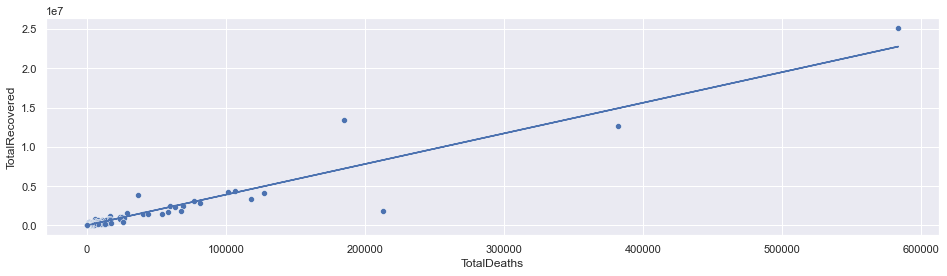

In [38]:
plt.figure(figsize=(16,4))
# plt.axis([0, 1000, 0, 50000])
sns.scatterplot(data = df, x = 'TotalDeaths', y= 'TotalRecovered')
plt.plot(df['TotalDeaths'], res.intercept + res.slope*df['TotalDeaths']);

We zoom to where the distribution is most dense:

Ta phóng to vào nơi mật độ dày đặc nhất:

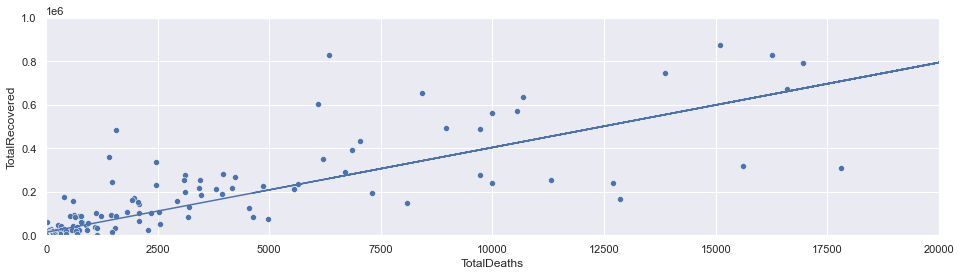

In [39]:
plt.figure(figsize=(16,4))
plt.axis([0, 20000, 0, 1000000])
sns.scatterplot(data = df, x = 'TotalDeaths', y= 'TotalRecovered')
plt.plot(df['TotalDeaths'], res.intercept + res.slope*df['TotalDeaths']);

</br>

Ta thấy rằng đó là quan hệ hồi quy, với R-squared = 0.900844

Để thấy thêm thông tin (nếu có), ta thêm trường `TotalTests` vào biểu đồ trên

Ý tưởng để thêm trường này là chia bin `TotalTests`, sau đó trực quan hóa nó lên biểu đồ dưới dạng style

In [40]:
df_1 = df.copy()
df_1['TotalTests_bins'] = pd.cut(np.array(df_1['TotalTests']),bins=3,labels=['Low','Medium','High'])

In [41]:
df_1['TotalTests_bins'].value_counts()

Low       215
Medium      3
High        1
Name: TotalTests_bins, dtype: int64

</br>

Vấn đề là `TotalTests` bị lệch

Chúng ta trước hết vẫn vẽ biểu đồ bình thường, để xem có gì đặc biệt ở các điểm bị lệch không, sau đó phóng to vào nơi phân bố dày đặc, và xử lý với sự lệch.

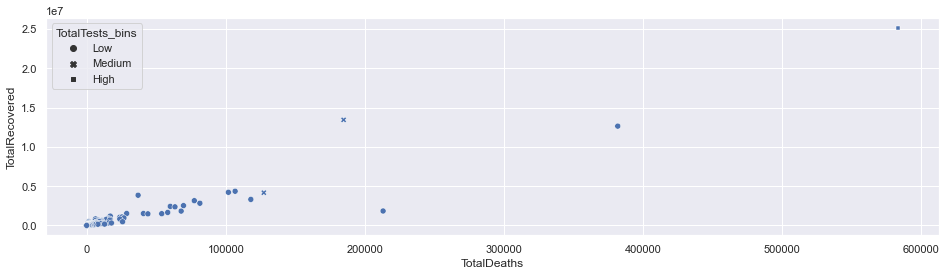

In [42]:
plt.figure(figsize=(16,4))
# plt.axis([0, 1000, 0, 50000])
sns.scatterplot(data = df_1, x = 'TotalDeaths', y= 'TotalRecovered', style = 'TotalTests_bins');

Có một nước cao ở cả ba thuộc tính `TotalDeaths`,`TotalRecovered` và `TotalTest`, đây là điểm outlier, tuy nhiên vẫn có sự tương quan giữa 3 thuộc tính.

</br>

Đât nước đó là: 

</br>

In [43]:
df_1[df_1['TotalTests_bins'] == 'High']

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Active - New,TotalTests_bins
#,,,,,,,,,,,,,,,,
2,USA,32602051,65057.0,583330,876.0,25177434,73818.0,6841287,10009.0,98032.0,1754.0,433439646.0,1303328.0,332563810,6776230.0,High


Còn một điều đặc biệt nữa ta có thể thấy, có 3 điểm ở mức Medium của `TotalTests`, nhưng ta chỉ có thể thấy 2 điểm trên biểu đồ lớn, và 2 điểm này đều có sự tương quan giữa 3 thuộc tính, cũng như hầu hết các điểm có Low `TotalTests`. Tuy nhiên có 1 điểm ta không thể thấy, nếu nó có sự tương quan giữa 3 thuộc tính như các điểm khác, thì nó phải ở tầm giữa biểu đồ như 2 điểm còn lại. Ta kiểm tra:

In [44]:
df_1[df_1['TotalTests_bins'] == 'Medium']

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Active - New,TotalTests_bins
#,,,,,,,,,,,,,,,,
1,China,90541,21.0,4636,0.0,85600,27.0,305,6.0,63.0,3.0,160000000.0,111163.0,1439323776,284.0,Medium
3,India,15924806,315802.0,184672,2102.0,13449406,179543.0,2290728,8944.0,11449.0,133.0,271053392.0,194876.0,1390901395,1974926.0,Medium
8,UK,4395703,2396.0,127327,22.0,4166734,5301.0,101642,300.0,64479.0,1868.0,146043397.0,2142250.0,68172895,99246.0,Medium


Đó là Trung Quốc, nơi virus xuất hiện đầu tiên. Đất nước này có `TotalCases` và `TotalDeaths` đều thấp, nhưng lại cao hơn rất nhiều ở `TotalTests`

</br>

Giờ, chúng ta xử lý sự lệch:

In [45]:
# df_2 = df_1.copy()
df_1['TotalTests'].skew()

8.038082042855878

In [46]:
transformed = np.log(df_1['TotalTests'] + 10000)
transformed.skew()

0.16754407526658413

In [47]:
df_1['TotalTests'] = transformed

In [48]:
df_1['TotalTests_bins'] = pd.cut(np.array(df_1['TotalTests']),bins=2,labels=['Low','High'])
df_1['TotalTests_bins'].value_counts()

Low     143
High     76
Name: TotalTests_bins, dtype: int64

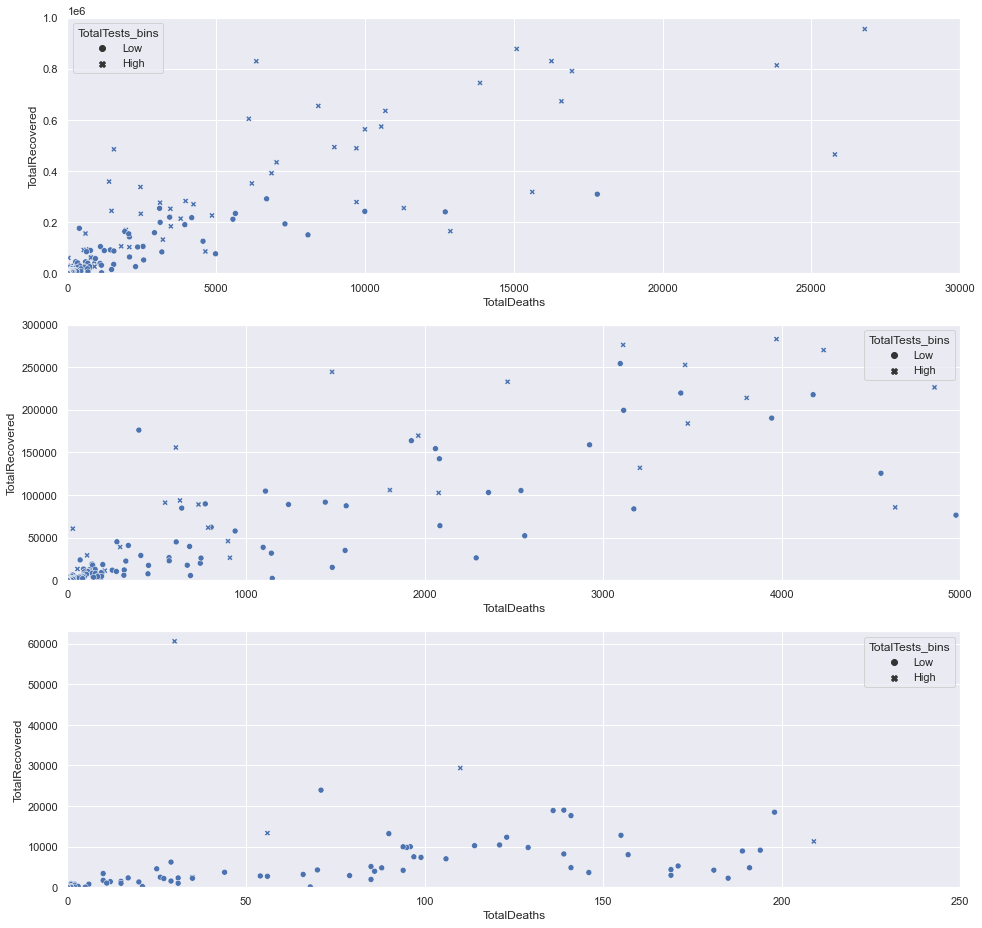

In [49]:
fig, axs = plt.subplots(nrows=3)
fig.set_size_inches(16, 16)
# plt.figure(figsize=(16,4))
axs[0].axis([0, 30000, 0, 1000000])
sns.scatterplot(data = df_1, x = 'TotalDeaths', y= 'TotalRecovered', style = 'TotalTests_bins', ax = axs[0])
axs[1].axis([0, 5000, 0, 300000])
sns.scatterplot(data = df_1, x = 'TotalDeaths', y= 'TotalRecovered', style = 'TotalTests_bins', ax = axs[1])
axs[2].axis([0, 250, 0, 63000])
sns.scatterplot(data = df_1, x = 'TotalDeaths', y= 'TotalRecovered', style = 'TotalTests_bins', ax = axs[2]);

Ta thấy có sự tương quan giữa `TotalTests` với `TotalDeaths` và `TotalRecovered`:

- Thấp ở `TotalTests` thì Thấp ở`TotalDeaths` và thấp ở `TotalRecovered`

- Cao ở `TotalTests` thi Cao ở `TotalDeaths` và Cao ở `TotalRecovered`

## TotalCases vs NewCases

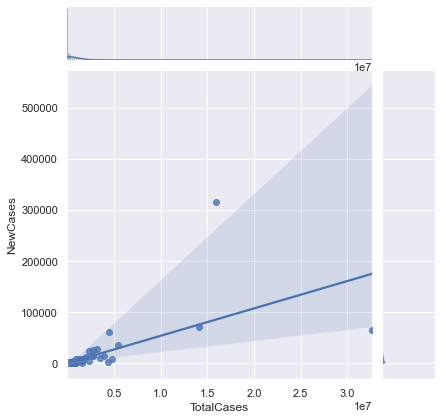

In [50]:
sns.jointplot(x = 'TotalCases', y ='NewCases', data = df, kind ='reg' );

<p>Sự tương quan giữa NewCases và Total Case:</p>
<p>Phân bố đều, các quốc gia có số lượng TotalCase thấp thì thường có số lượng NewCase nhỏ, tuy nhiên vẫn có một số quốc gia có lượng TotalCase cao nhưng lại lượng NewCase thấp  </p>
<p>Các điểm phân bố gần gốc tọa độ, lượng NewCase và TotalCase tập trung phân bố đều ở các quốc gia</p>

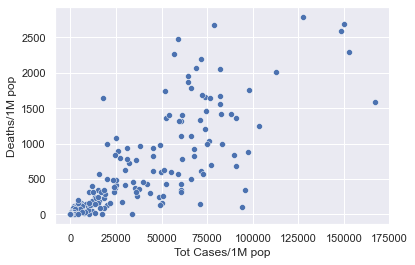

In [51]:
sns.scatterplot(x = 'Tot Cases/1M pop', y = 'Deaths/1M pop', data = df);

## Tot Cases/1M pop, Tests/1M pop và Deaths/1M pop

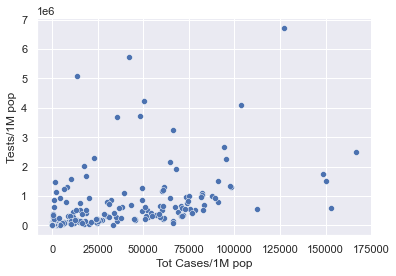

In [52]:
sns.scatterplot(x = 'Tot Cases/1M pop', y = 'Tests/1M pop', data = df);

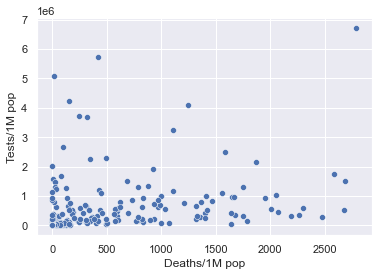

In [53]:
sns.scatterplot(x = 'Deaths/1M pop', y = 'Tests/1M pop', data = df);

<p>3 biểu đồ trên thể hiện sự phân bố đông đều của Tests/1M pop, Tot Case/1M pop và Deaths/1M pop: Vỡi mỗi 1 triệu người thì: </p>
<p>Total Cases/1M pop càng cao thì Deaths/1M pop càng lớn, hầu hết các quốc gia có Total Case/1M pop dưới 25000 và Deaths/1M pop tập trung dưới 500</p>
<p>Số lượng Tests/1M pop tỉ lệ thuận với Tot Case/1M pop, các quốc gia có số lượng người nhiễm càng lớn, thì số lần xét nghiệm càng nhiều. Tuy nhiên vẫn có nhiều quốc gia có số lượng nhiễm cao nhưng tỉ lệ được xét nghiệm lại rất thấp => biểu đồ thể hiện gần phân nửa số quốc gia chưa thật sự xét nghiệm đầy đủ </p>
<p>Số lượng Tests /1M pop không gây ảnh hưởng đến Deaths/1M pop, hầu hết các quốc gia chỉ xét nghiệm 2 người trên 1 triệu người, số lượng người chết trải dài từ 0 đến 2500 người trên 1 triệu người. 
</p>